# Задание:

  Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

  Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
  - обработку пропусков в данных;
  - кодирование категориальных признаков;
  - масштабирование данных.


In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/usr/data/Air Quality Missing Data.csv', sep=',')

In [4]:
data.shape

(153, 5)

In [ ]:
data.head()

,Date,Ozone,Solar,Wind,Temp
0,01-05-1976,41.0,190.0,7.4,67
1,02-05-1976,36.0,118.0,8.0,72
2,03-05-1976,12.0,149.0,12.6,74
3,04-05-1976,18.0,313.0,11.5,62
4,05-05-1976,NaN,NaN,14.3,56


## Проверка на пропущенные значения

In [ ]:
data.isnull().sum()

,0
Date,0
Ozone,37
Solar,7
Wind,0
Temp,0


Работаем с ozone, solar

# Обработка пропусков
## Заполнение нулями
Заполним нулями solar, так как пропущенных значений не так много. Также в этом датасете нет категориальных признаков, поэтому это не критично.

In [ ]:
data_new = data.fillna(0)
data_new.head()

,Date,Ozone,Solar,Wind,Temp
0,01-05-1976,41.0,190.0,7.4,67
1,02-05-1976,36.0,118.0,8.0,72
2,03-05-1976,12.0,149.0,12.6,74
3,04-05-1976,18.0,313.0,11.5,62
4,05-05-1976,0.0,0.0,14.3,56


## Импьютация (замещение данных)
Внедрим значения ozone.

In [ ]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Ozone. Тип данных float64. Количество пустых значений 37, 24.18%.
Колонка Solar. Тип данных float64. Количество пустых значений 7, 4.58%.


In [ ]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Ozone,Solar
0,41.0,190.0
1,36.0,118.0
2,12.0,149.0
3,18.0,313.0
4,NaN,NaN
...,...,...
148,30.0,193.0
149,NaN,145.0
150,14.0,191.0
151,18.0,131.0


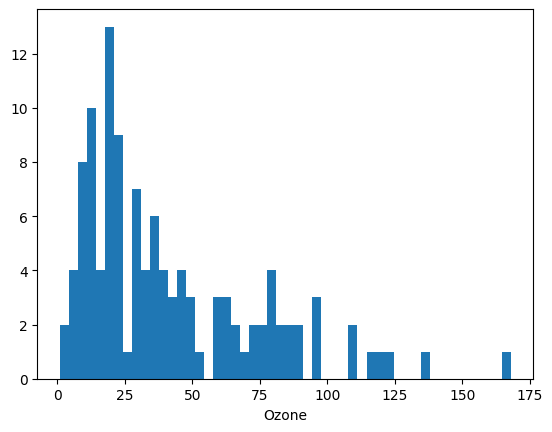

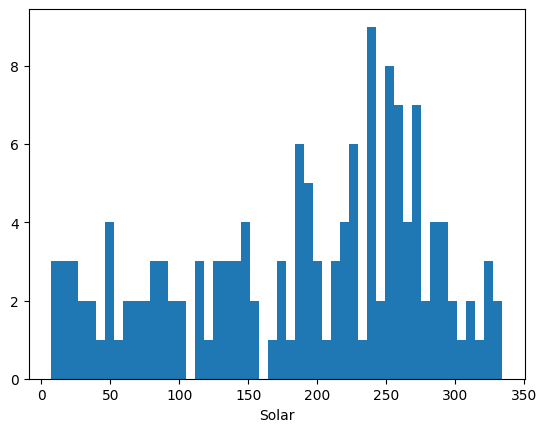

In [ ]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [ ]:
data_num_solar = data_num[['Solar']]

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_solar)
mask_missing_values_only



array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

### Среднее и медиана


Плюсы:

    Просто и быстро.
    Хорошо работает на небольших наборах численных данных.

Минусы:

    Значения вычисляются независимо для каждого столбца, так что корреляции между параметрами не учитываются.
    Не работает с качественными переменными.
    Метод не особенно точный.
    Никак не оценивается погрешность импутации.
  

### Наиболее частое

Импутация самым часто встречающимся значением — ещё одна простая стратегия для компенсации пропущенных значений, не учитывающая корреляций между параметрами. Плюсы и минусы те же, что и в предыдущем пункте, но этот метод предназначен для качественных переменных.

In [ ]:
strategies=['mean', 'median', 'most_frequent']

test_num_impute_col(data, 'Solar', strategies[0])

('Solar', 'mean', 7, 185.93150684931507, 185.93150684931507)

# Кодирование категориальных признаков

**Категориальный признак** (или категориальная переменная) — это тип данных, который представляет собой качественную характеристику объекта, выраженную в виде категорий или классов. В отличие от числовых признаков, которые измеряются количественно (например, возраст, вес, температура), категориальные признаки описывают принадлежность объекта к определённой группе или классу.

Основные характеристики категориальных признаков:

**Дискретность:**
  Категориальные признаки принимают конечное число значений (категорий). Например, пол (мужской, женской), цвет (красный, синий, зелёный), тип автомобиля (седан, внедорожник, хэтчбек).

**Отсутствие порядка:**
  В большинстве случаев категории не имеют числового порядка. Например, цвета (красный, синий, зелёный) нельзя упорядочить по возрастанию или убыванию. Однако существуют порядковые категориальные признаки, где категории имеют определённый порядок (например, уровень образования: начальное, среднее, высшее).

**Качественная природа:**
  Категориальные признаки описывают качественные свойства объектов, а не количественные.

---
Примеры категориальных признаков

  - Демографические данные:

        Пол: мужской, женской.

        Семейное положение: холост, женат, разведён.

  - Товары и услуги:

        Тип продукта: электроника, одежда, продукты питания.

        Бренд: Apple, Samsung, Xiaomi.

  - Медицинские данные:

        Группа крови: A, B, AB, O.

        Диагноз: грипп, простуда, аллергия.
  ---
  Большинство алгоритмов машинного обучения работают только с числовыми данными, поэтому категориальные признаки нужно преобразовать в числовой формат. Основные методы преобразования:

- One-Hot Encoding (OHE):
  Каждая категория преобразуется в в комбинацию 0 и 1. Например:

        Цвет: красный → [1, 0, 0], синий → [0, 1, 0], зелёный → [0, 0, 1].

- Label Encoding:
  Каждой категории присваивается уникальное число. Например:

        Красный → 0, синий → 1, зелёный → 2.

- Ordinal Encoding:
  Используется для порядковых категориальных признаков, где категории заменяются числами с учётом их порядка. От лучшего к худшему -> берет числа: лучший - условно 10, худший - 0. Например:

        Уровень образования: начальное → 1, среднее → 2, высшее → 3.

- Target Encoding:
  Категории заменяются средним значением целевой переменной для каждой категории. Например, если целевая переменная — это цена, то для категории "красный" можно использовать среднюю цену всех красных объектов.

In [6]:
data_cat = pd.read_csv('/usr/data/Penguins.csv', sep=',')

Целевая переменная - пол.

In [ ]:
data_cat.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
data_cat.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета

total_counts = data.shape[0]
cat_cols = []
for col in data_cat.columns:
    # Количество пустых значений
    temp_null_count = data_cat[data_cat[col].isnull()].shape[0]
    dt = str(data_cat[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_counts) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка sex. Тип данных object. Количество пустых значений 11, 7.19%.


In [13]:
data_cat['sex'] = data_cat['sex'].map({
    'FEMALE': 1,
    'MALE': 2
})

In [14]:
cat_temp_data = data_cat[['sex']]
cat_temp_data.head()

,sex
0,2.0
1,1.0
2,1.0
3,NaN
4,1.0


In [15]:
cat_temp_data['sex'].unique()

array([ 2.,  1., nan])

In [16]:
cat_temp_data[cat_temp_data['sex'].isnull()].shape

(11, 1)

In [19]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([[2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],

In [20]:
# Пустые значения отсутствуют?
np.unique(data_imp2)
# Да

array([1., 2.])

# Масштабирование

Будем масштабировать первый датасет с качеством воздуха. MinMax - Solar, Z-оценка - Temp.

## MinMax




In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Solar']])

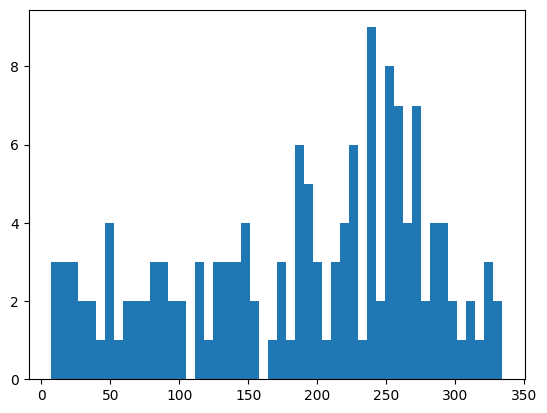

In [ ]:
plt.hist(data['Solar'], 50)
plt.show()

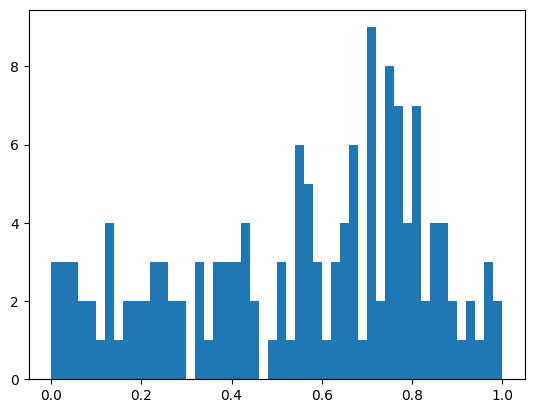

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

## Z-оценка
**Z-оценка**- это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Temp']])

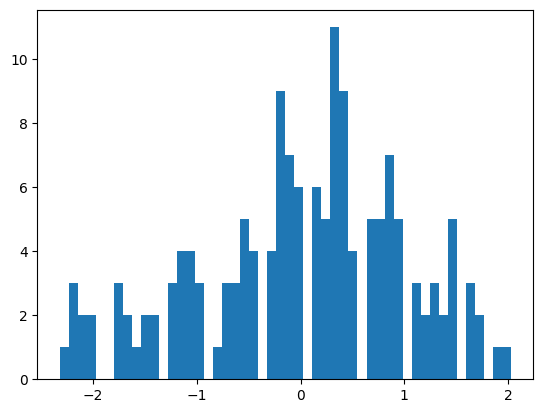

In [ ]:
plt.hist(sc2_data, 50)
plt.show()